---
title: "Pool Management"
subtitle: "MEL"
author: "Departamento Confiabilidad"
date: today
---

<div style="text-align: right;">
  <img src="komatsu-logo.png" width="150">
</div>

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from IPython.display import Markdown
import dagster as dg
import polars as pl
from kdags.definitions import *
from kdags.readr import *
from datetime import datetime, timedelta
from theme_komatsu import *

context = dg.build_asset_context()

In [2]:
result = kdefs.get_job_def("pool_inventory_job").execute_in_process(
    raise_on_error=False
)

2025-06-02 17:52:50 -0400 - dagster - DEBUG - pool_inventory_job - 819e59dc-3f50-4794-8636-4568536eb85e - 27696 - RUN_START - Started execution of run for "pool_inventory_job".
2025-06-02 17:52:50 -0400 - dagster - DEBUG - pool_inventory_job - 819e59dc-3f50-4794-8636-4568536eb85e - 27696 - ENGINE_EVENT - Executing steps in process (pid: 27696)
2025-06-02 17:52:50 -0400 - dagster - DEBUG - pool_inventory_job - 819e59dc-3f50-4794-8636-4568536eb85e - 27696 - RESOURCE_INIT_STARTED - Starting initialization of resources [io_manager].
2025-06-02 17:52:50 -0400 - dagster - DEBUG - pool_inventory_job - 819e59dc-3f50-4794-8636-4568536eb85e - 27696 - RESOURCE_INIT_SUCCESS - Finished initialization of resources [io_manager].
2025-06-02 17:52:50 -0400 - dagster - DEBUG - pool_inventory_job - 819e59dc-3f50-4794-8636-4568536eb85e - 27696 - LOGS_CAPTURED - Started capturing logs in process (pid: 27696).
2025-06-02 17:52:50 -0400 - dagster - DEBUG - pool_inventory_job - 819e59dc-3f50-4794-8636-4568536

# Estado actual componentes

Esta sección indica en que estado se encuentran los componentes actualmente


In [30]:
cl_df = result.asset_value("mutate_component_lifeline")
s_df = result.asset_value("mutate_component_snapshots")
columns = [
    "component_name",
    "subcomponent_name",
    "component_serial",
    "sap_equipment_name",
]
df = (
    cl_df.clone()
    .sort([*columns, "changeout_date"])
    .unique(subset=columns, keep="last")
    .join(
        s_df.sort([*columns, "snapshot_date"])
        .unique(subset=columns, keep="last")
        .select([*columns, "component_state"]),
        how="left",
        on=columns,
    )
)
reorder_columns = [
    # "component_name",
    # "position_name",
    "mounted_equipment_name",
    "mounted_position_name",
    "component_serial",
    "component_state",
    "repair_count",
    "cumulative_component_hours",
    "is_retired",
]
df = df.select(*reorder_columns, pl.exclude(reorder_columns)).sort(
    ["mounted_equipment_name", "component_name", "subcomponent_name", "position_name"]
)
# df
# df = df.filter(pl.col("repair_recency_rank") == 0)
# df.with_columns(repair_count=pl.col("repair_count").fill_null(0)).group_by(
#     ["component_name", "subcomponent_name", "component_serial", "sap_equipment_name"]
# ).agg(repair_count=pl.col("repair_count").min())
# df.filter(pl.col("repair_recency_rank").is_null())

## Motor de Tracción

::: {.panel-tabset}

### Componentes Montados

In [40]:
show_df = (
    df.select(reorder_columns)
    .filter(pl.col("component_state") == "mounted")
    .drop(["component_state", "is_retired"])
    .rename(
        {
            "mounted_equipment_name": "equipment_name",
            "mounted_position_name": "position_name",
        }
    )
    .to_pandas()
)
Markdown(show_df.to_markdown(index=False))

| equipment_name   | mounted_position_name   | component_serial   |   repair_count |   cumulative_component_hours |
|:-----------------|:------------------------|:-------------------|---------------:|-----------------------------:|
| TK320            | derecho                 | WX14030010T        |              3 |                      52483   |
| TK320            | izquierdo               | W11120007          |              3 |                      63862   |
| TK322            | izquierdo               | W13050087          |              5 |                      49748   |
| TK322            | derecho                 | WX14100053T        |              4 |                      49195   |
| TK396            | izquierdo               | W09030007          |              2 |                      31428   |
| TK396            | derecho                 | W12010004          |              3 |                      52604   |
| TK397            | izquierdo               | W12010012          |              3 |                      37650   |
| TK397            | derecho                 | WX15040005T        |              3 |                      34537   |
| TK398            | derecho                 | WX14010001T        |              2 |                      22604   |
| TK398            | izquierdo               | WX1902Y002T        |              1 |                      27730   |
| TK399            | izquierdo               | WX1712Y002T        |              2 |                      16492   |
| TK399            | derecho                 | W11120008          |              4 |                      72266   |
| TK847            | derecho                 | W13070053          |              1 |                      21852   |
| TK847            | izquierdo               | WX1505Y006         |              2 |                      25874   |
| TK848            | derecho                 | W13040080          |              2 |                      37149   |
| TK848            | izquierdo               | W13060060          |              4 |                      42116   |
| TK849            | derecho                 | WX14100050T        |              3 |                      33967   |
| TK849            | izquierdo               | WX14080032T        |              3 |                      51066   |
| TK850            | derecho                 | W12030041          |              4 |                      52405   |
| TK850            | izquierdo               | WX1902Y001T        |              1 |                      18635   |
| TK851            | izquierdo               | WX14100055T        |              2 |                      39397   |
| TK851            | derecho                 | W11120011          |              3 |                      56146   |
| TK852            | izquierdo               | WX14020005T        |              4 |                      38844   |
| TK852            | derecho                 | WX14030012T        |              4 |                      53527   |
| TK853            | derecho                 | WX14030011T        |              2 |                      13854   |
| TK853            | izquierdo               | WX14100046T        |              1 |                      28981   |
| TK854            | izquierdo               | WX141000517        |              5 |                      36077   |
| TK854            | derecho                 | W12010002          |              2 |                      33011   |
| TK855            | izquierdo               | W11100008          |              4 |                      73200   |
| TK855            | derecho                 | WX14030014T        |              2 |                      15031   |
| TK856            | derecho                 | WX1505Y007         |              1 |                      25025   |
| TK857            | izquierdo               | W12020025          |              2 |                      52851   |
| TK857            | derecho                 | WX14100044T        |              3 |                      44040   |
| TK858            | derecho                 | W11110017          |              4 |                      95425   |
| TK858            | izquierdo               | WX1612Y006T        |              1 |                      21043   |
| TK859            | izquierdo               | W11110015          |              6 |                      61891   |
| TK859            | derecho                 | WX15030002T        |              1 |                      24608   |
| TK860            | izquierdo               | WX14020004T        |              3 |                      49799   |
| TK860            | derecho                 | W11120018          |              4 |                      41688   |
| TK861            | derecho                 | WU12010014         |              2 |                      32174   |
| TK861            | izquierdo               | WX14020006T        |              3 |                      23287   |
| TK862            | izquierdo               | W11110001          |              4 |                      50862   |
| TK862            | derecho                 | W08090001          |              2 |                      44163.1 |
| TK863            | izquierdo               | WX14100047T        |              1 |                      16987   |
| TK863            | derecho                 | WX14110056T        |              2 |                      34931   |
| TK864            | derecho                 | WX14100052T        |              4 |                      30513   |
| TK864            | izquierdo               | WX14090043T        |              3 |                      33425   |
| TK865            | izquierdo               | W11120019          |              2 |                      49700   |
| TK865            | derecho                 | WX14100045T        |              4 |                      30504   |
| TK866            | izquierdo               | WX14060028T        |              2 |                      47961   |
| TK866            | derecho                 | W08100003          |              4 |                      39164   |
| TK867            | izquierdo               | W12010001          |              4 |                      70297   |
| TK867            | derecho                 | WX14090039T        |              2 |                      36679   |
| TK868            | derecho                 | W11110006          |              5 |                      49637   |
| TK868            | izquierdo               | WX14020003T        |              3 |                      40785   |
| TK869            | izquierdo               | WX12010013         |              2 |                      43493   |
| TK869            | derecho                 | W12010016          |              3 |                      64079   |
| TK870            | izquierdo               | WX1612Y007T        |              1 |                      28118   |
| TK870            | derecho                 | W08080004          |              1 |                      23851   |
| TK871            | derecho                 | WX14090036T        |              3 |                      29759   |
| TK871            | izquierdo               | W12010015          |              5 |                      44775   |
| TK872            | derecho                 | WX15020001T        |              2 |                      33483   |
| TK873            | izquierdo               | WX14020009T        |              3 |                      55218   |
| TK873            | derecho                 | WX14110058T        |              3 |                      56032   |
| TK874            | izquierdo               | W05100001          |              2 |                      22369   |
| TK874            | derecho                 | W11110013          |              3 |                      32266   |
| TK875            | derecho                 | WX1410049T         |              3 |                      53475   |
| TK875            | izquierdo               | W11110014          |              3 |                      63284   |
| TK876            | izquierdo               | WX14060027T        |            nan |                        nan   |
| TK876            | derecho                 | W08100002          |              7 |                      63401   |
| TK877            | izquierdo               | W12010009A         |              3 |                      71705   |
| TK877            | derecho                 | WX14080030T        |              3 |                      49801   |
| TK878            | derecho                 | W12030036          |              5 |                      58313   |
| TK878            | izquierdo               | W08040005          |              5 |                      57213   |
| TK879            | derecho                 | WX15030003T        |              3 |                      48689   |
| TK879            | izquierdo               | WX14110057T        |              1 |                       7923   |
| TK880            | derecho                 | W13020043          |              2 |                      35337   |
| TK880            | izquierdo               | WX14120060T        |              3 |                      24197   |
| TK881            | derecho                 | WX14100054T        |              5 |                      50799   |
| TK881            | izquierdo               | W11120020          |              3 |                      52675   |
| TK882            | derecho                 | W12010005          |              4 |                      69084   |
| TK882            | izquierdo               | W13030037          |              3 |                      35779   |
| TK883            | izquierdo               | WX14110059T        |              1 |                      24722   |

### Componentes en reparación


In [72]:
unmounted_df = df.filter(
    ~pl.col("component_state").is_in(["mounted", "retired"])
).select(
    [
        "equipment_name",
        "component_serial",
        "repair_count",
        "cumulative_component_hours",
        "changeout_date",
        "reception_date",
    ]
)
Markdown(unmounted_df.to_pandas().to_markdown(index=False))

| equipment_name   | component_serial   |   repair_count |   cumulative_component_hours | changeout_date      | reception_date      |
|:-----------------|:-------------------|---------------:|-----------------------------:|:--------------------|:--------------------|
| TK876            | W12010017          |            nan |                          nan | 2025-04-27 00:00:00 | 2025-05-08 00:00:00 |
| TK882            | W11110005          |              3 |                        74553 | 2025-03-31 00:00:00 | 2025-04-10 00:00:00 |
| TK879            | W12010011          |              6 |                        58712 | 2025-03-02 00:00:00 | 2025-03-17 00:00:00 |
| TK878            | WX1606Y004T        |            nan |                          nan | 2024-03-26 00:00:00 | NaT                 |
| TK875            | WX14080031T        |              3 |                        51549 | 2025-01-22 00:00:00 | 2025-01-30 00:00:00 |
| TK881            | WX14090042T        |            nan |                          nan | 2025-05-23 00:00:00 | NaT                 |
| TK878            | WX14080033T        |              2 |                        56109 | 2024-09-26 00:00:00 | 2024-11-15 00:00:00 |
| TK867            | WX14100048T        |              3 |                        47751 | 2024-12-31 00:00:00 | 2025-01-16 00:00:00 |
| TK856            | WX14020007T        |              3 |                        52451 | 2024-05-20 00:00:00 | 2024-07-10 00:00:00 |
| TK320            | WX14030013T        |              4 |                        58677 | 2025-04-10 00:00:00 | 2025-04-21 00:00:00 |
| TK854            | W12010003          |            nan |                          nan | 2025-05-08 00:00:00 | NaT                 |

In [68]:
unmounted_stated_df = (
    result.asset_value("mutate_component_states")
    .join(unmounted_df.select(["component_serial"]), how="inner", on="component_serial")
    .filter(pl.col("start_date") >= datetime.now() - timedelta(days=365))
)

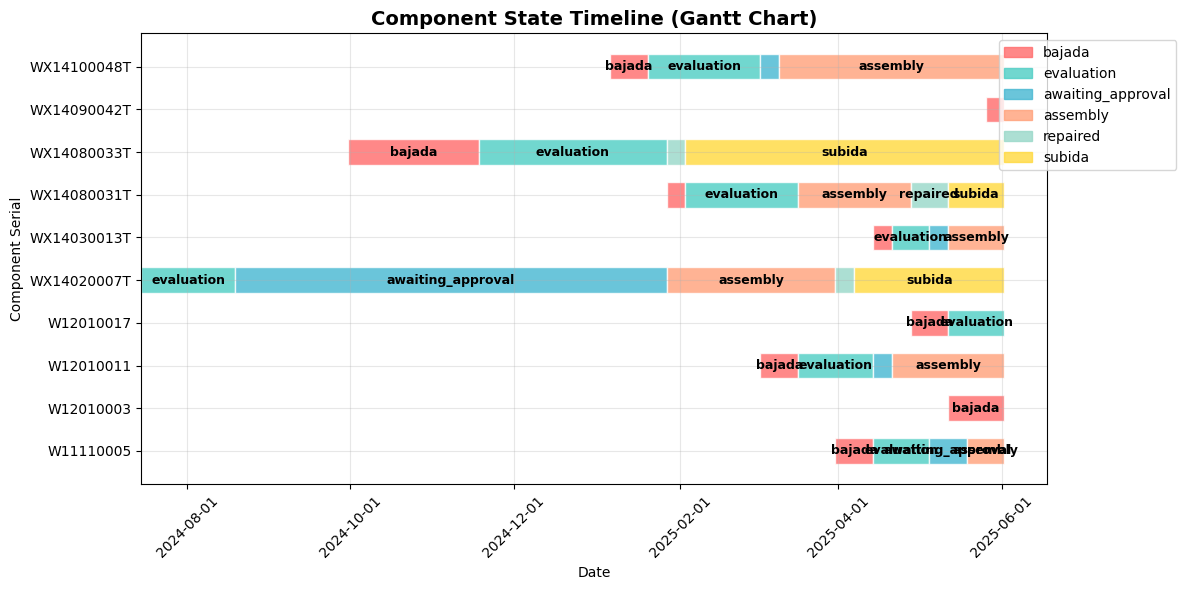

In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta


def plot_component_gantt(periods_df, figsize=(12, 6)):
    """
    Create a Gantt chart using matplotlib
    """
    # Create compressed periods

    component_serials = periods_df["component_serial"].drop_duplicates().to_list()
    if len(periods_df) == 0:
        print("No data found for the selected components")
        return None

    # Define colors for states
    state_colors = {
        "mounted": "#2E8B57",  # Sea Green
        "bajada": "#FF6B6B",  # Light Red
        "evaluation": "#4ECDC4",  # Turquoise
        "awaiting_approval": "#45B7D1",  # Sky Blue
        "assembly": "#FFA07A",  # Light Salmon
        "repaired": "#98D8C8",  # Mint
        "subida": "#FFD93D",  # Yellow
        "retired": "#696969",  # Dim Gray
        "unknown": "#D3D3D3",  # Light Gray
    }

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Plot each component
    for i, component in enumerate(component_serials):
        comp_periods = periods_df[periods_df["component_serial"] == component]

        for _, period in comp_periods.iterrows():
            start = period["start_date"]
            end = period["end_date"]
            duration = (end - start).days
            state = period["state"]

            # Create the bar
            ax.barh(
                i,
                duration,
                left=start,
                height=0.6,
                color=state_colors.get(state, "#D3D3D3"),
                alpha=0.8,
                edgecolor="white",
                linewidth=1,
            )

            # Add state label if bar is wide enough
            if duration > 10:  # Only show label if bar is wide enough
                ax.text(
                    start + timedelta(days=duration / 2),
                    i,
                    state,
                    ha="center",
                    va="center",
                    fontsize=9,
                    fontweight="bold",
                )

    # Customize the plot
    ax.set_yticks(range(len(component_serials)))
    ax.set_yticklabels(component_serials)
    ax.set_xlabel("Date")
    ax.set_ylabel("Component Serial")
    ax.set_title(
        "Component State Timeline (Gantt Chart)", fontsize=14, fontweight="bold"
    )

    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.xticks(rotation=45)

    # Add legend
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, color=color, alpha=0.8, label=state)
        for state, color in state_colors.items()
        if state in periods_df["state"].values
    ]
    ax.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.15, 1))

    # Grid and layout
    ax.grid(True, alpha=0.3)
    plt.tight_layout()

    return fig, ax


fig, ax = plot_component_gantt(unmounted_stated_df.to_pandas())
plt.show()

### Componentes Retirados

In [75]:
retired_df = df.filter(pl.col("component_state") == "retired").select(
    [
        "component_serial",
        "retired_date",
        "repair_count",
        "cumulative_component_hours",
    ]
)
Markdown(retired_df.to_pandas().to_markdown(index=False))

| component_serial   | retired_date        |   repair_count |   cumulative_component_hours |
|:-------------------|:--------------------|---------------:|-----------------------------:|
| WX14040016T        | 2021-11-10 00:00:00 |              3 |                        27819 |
| W13040074          | 2023-06-28 00:00:00 |              2 |                        41221 |
| WX14100051T        | 2019-10-19 00:00:00 |            nan |                          nan |
| W05100007          | 2020-11-17 00:00:00 |              6 |                        43176 |
| WX14020008T        | 2025-01-10 00:00:00 |              2 |                        54187 |
| W11120009          | 2025-03-04 00:00:00 |              3 |                        28082 |

:::

# Análisis del Inventario y Flujo en el Taller de Reparación

Objetivo: Entender la carga de trabajo del taller y cómo ha fluctuado el inventario de componentes dentro del taller a lo largo del tiempo.

**Contenido:**
Análisis de la cantidad de componentes que ingresan y egresan del taller.
Evolución del número total de componentes en las distintas fases de reparación dentro del taller.

In [99]:
from theme_komatsu import *

Monthly counts:
shape: (77, 6)
┌────────────┬─────────────┬───────────┬──────┬────────────────┬───────┐
│ year_month ┆ month_label ┆ month_num ┆ year ┆ component_name ┆ count │
│ ---        ┆ ---         ┆ ---       ┆ ---  ┆ ---            ┆ ---   │
│ str        ┆ str         ┆ i8        ┆ i32  ┆ str            ┆ u32   │
╞════════════╪═════════════╪═══════════╪══════╪════════════════╪═══════╡
│ 2019-01    ┆ jan         ┆ 1         ┆ 2019 ┆ motor_traccion ┆ 1     │
│ 2019-02    ┆ feb         ┆ 2         ┆ 2019 ┆ motor_traccion ┆ 1     │
│ 2019-03    ┆ mar         ┆ 3         ┆ 2019 ┆ motor_traccion ┆ 3     │
│ 2019-04    ┆ apr         ┆ 4         ┆ 2019 ┆ motor_traccion ┆ 3     │
│ 2019-05    ┆ may         ┆ 5         ┆ 2019 ┆ motor_traccion ┆ 4     │
│ …          ┆ …           ┆ …         ┆ …    ┆ …              ┆ …     │
│ 2025-01    ┆ jan         ┆ 1         ┆ 2025 ┆ motor_traccion ┆ 11    │
│ 2025-02    ┆ feb         ┆ 2         ┆ 2025 ┆ motor_traccion ┆ 8     │
│ 2025-03    ┆ mar  

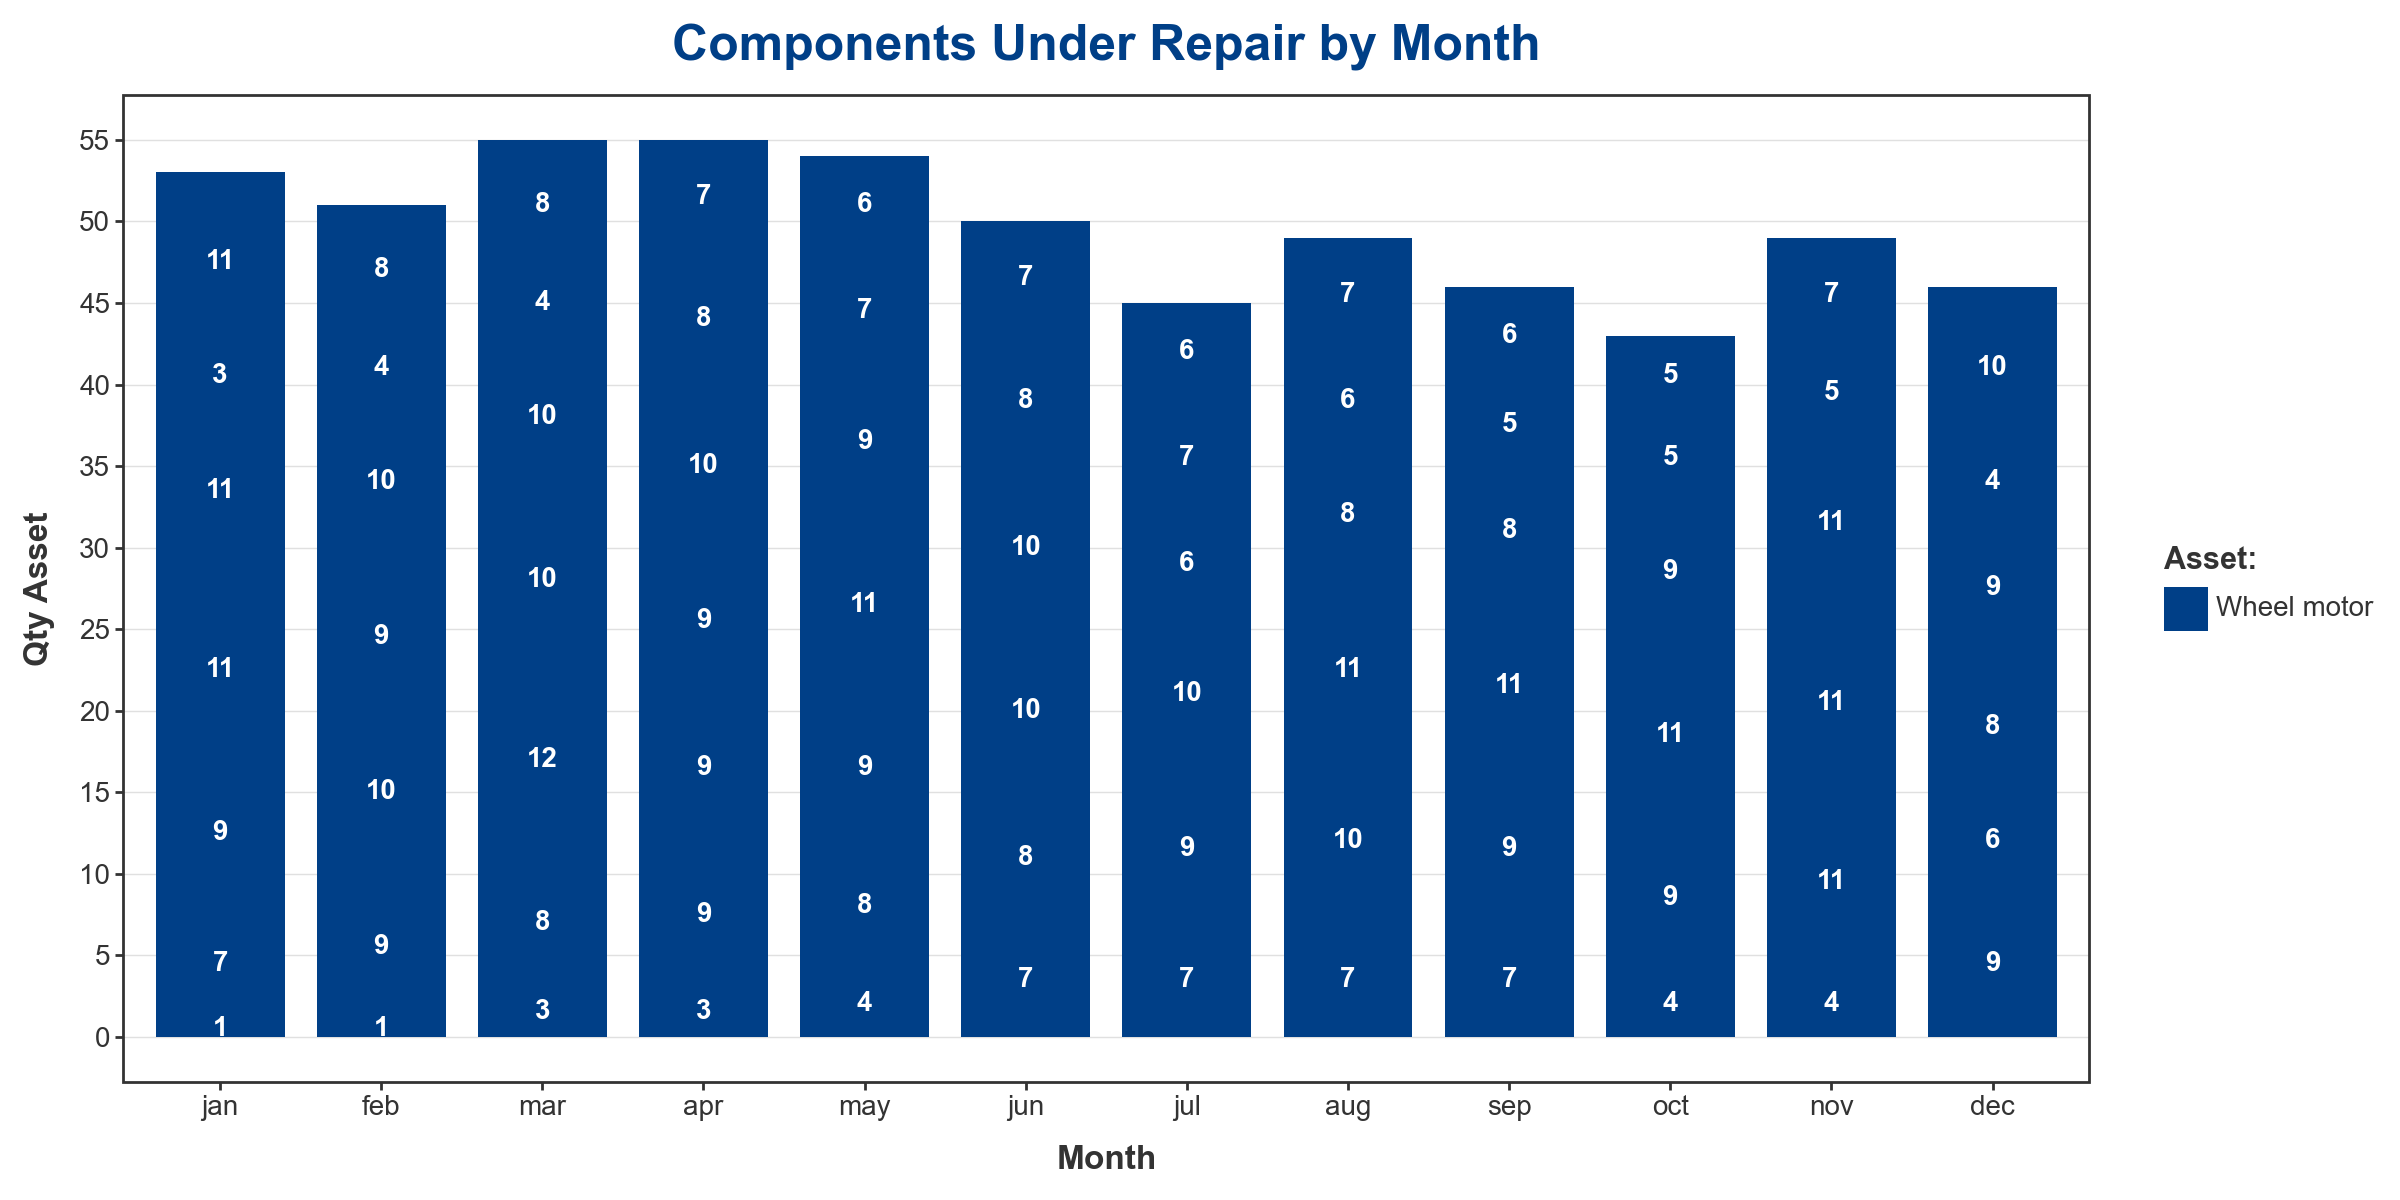

In [101]:
df = (
    result.asset_value("mutate_component_snapshots")
    .select(
        [
            "component_name",
            "subcomponent_name",
            "component_serial",
            "snapshot_date",
            "snapshot_week",
            "component_state",
        ]
    )
    .filter(
        ~pl.col("component_state").is_in(["mounted", "retired", "bajada", "subida"])
    )
)
# Filter for components under repair (assuming 'evaluation' means under repair)
# You can adjust this filter based on your actual repair states


# Extract month from snapshot_date and create month labels
df = df.with_columns(
    [
        pl.col("snapshot_date").dt.strftime("%Y-%m").alias("year_month"),
        pl.col("snapshot_date")
        .dt.strftime("%b")
        .str.to_lowercase()
        .alias("month_label"),
        pl.col("snapshot_date").dt.month().alias("month_num"),
        pl.col("snapshot_date").dt.year().alias("year"),
    ]
)

# Count unique component_serials by component_name and month
monthly_counts = (
    df.group_by(["year_month", "month_label", "month_num", "year", "component_name"])
    .agg(pl.col("component_serial").n_unique().alias("count"))
    .sort(["year_month", "component_name"])
)

# Debug: Let's see what we have
print("Monthly counts:")
print(monthly_counts)

# Convert to pandas for plotnine
df_plot = monthly_counts.to_pandas()

# Create mapping for component names to make them more readable
component_name_mapping = {
    "motor_traccion": "Wheel motor",
    "cilindro_direccion": "Steering cylinder",
    "suspension_delantera": "Front suspension",
    "suspension_trasera": "Rear suspension",
    "cilindro_levante": "Hoist cylinder",
}

# Apply mapping if needed
df_plot["component_name_display"] = df_plot["component_name"].replace(
    component_name_mapping
)

# Create a proper order for months
month_order = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun",
    "jul",
    "aug",
    "sep",
    "oct",
    "nov",
    "dec",
]

# Sort the dataframe by year_month to ensure proper ordering
df_plot = df_plot.sort_values(["year_month", "component_name"])

# ============================================================================
# VISUALIZATION
# ============================================================================

# Create the stacked area plot
plot = (
    p9.ggplot(
        df_plot,
        p9.aes(x="factor(month_label)", y="count", fill="component_name_display"),
    )
    + p9.geom_col(position="stack", width=0.8)  # Using geom_col instead of geom_area
    + p9.geom_text(
        p9.aes(label="count"),
        position=p9.position_stack(vjust=0.5),
        size=10,
        color="white",
        fontweight="bold",
        data=df_plot[df_plot["count"] > 0],  # Only show labels for non-zero values
    )
    + p9.scale_fill_manual(values=COMPONENT_COLORS)
    + p9.scale_x_discrete(
        limits=[
            m for m in month_order if m in df_plot["month_label"].unique()
        ]  # Only show months with data
    )
    + p9.labs(
        title="Components Under Repair by Month",
        x="Month",
        y="Qty Asset",
        fill="Asset:",
    )
    + p9.scale_y_continuous(
        breaks=range(
            0, int(df_plot["count"].sum()) + 5, 5 if df_plot["count"].sum() > 20 else 1
        )
    )
    + theme_komatsu(figure_size=(12, 6))
)

plot

#

component_name,position_name,mounted_equipment_name,mounted_position_name,component_serial,component_state,repair_count,cumulative_component_hours,is_retired,equipment_name,subcomponent_name,changeout_date,sap_equipment_name,retired_date,service_order,reception_date,mounted_date,repair_recency_rank
str,str,str,str,str,str,i64,f64,bool,str,str,date,i64,date,i64,date,date,i64
"""motor_traccion""","""derecho""",null,null,"""WX14040016T""","""retired""",3,27819.0,true,"""TK855""","""transmision""",2020-10-28,200155855,2021-11-10,14115692,2020-11-11,null,1
"""motor_traccion""","""derecho""",null,null,"""W05100007""","""retired""",6,43176.0,true,"""TK853""","""transmision""",2020-04-12,200028768,2020-11-17,14111275,2020-04-23,null,0
"""motor_traccion""","""derecho""",null,null,"""WX14100051T""","""retired""",null,null,true,"""TK864""","""transmision""",2020-08-29,200207810,2019-10-19,null,null,null,null
"""motor_traccion""","""derecho""",null,null,"""W12010017""","""evaluation""",null,null,null,"""TK876""","""transmision""",2025-04-27,200170157,null,14155112,2025-05-08,null,null
"""motor_traccion""","""derecho""",null,null,"""W12010011""","""assembly""",6,58712.0,null,"""TK879""","""transmision""",2025-03-02,200198766,null,14153563,2025-03-17,null,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""motor_traccion""","""izquierdo""",null,null,"""WX14080033T""","""subida""",2,56109.0,null,"""TK878""","""transmision""",2024-09-26,200157626,null,14150083,2024-11-15,null,0
"""motor_traccion""","""izquierdo""",null,null,"""W11120009""","""retired""",3,28082.0,true,"""TK874""","""transmision""",2022-01-07,200105819,2025-03-04,14124578,2022-01-21,null,0
"""motor_traccion""","""izquierdo""",null,null,"""W12010003""","""bajada""",null,null,null,"""TK854""","""transmision""",2025-05-08,200159223,null,null,null,null,null


In [4]:
result.asset_value("component_serials").filter(
    pl.col("subcomponent_name") == "transmision"
)

component_name,subcomponent_name,component_serial,sap_equipment_name,retired_date,is_retired
str,str,str,i64,date,bool
"""motor_traccion""","""transmision""","""W12010016""",200100867,null,null
"""motor_traccion""","""transmision""","""W12010005""",200179444,null,null
"""motor_traccion""","""transmision""","""WX2212Y004T""",200329991,null,null
"""motor_traccion""","""transmision""","""W13070053""",200230004,null,null
"""motor_traccion""","""transmision""","""W12010003""",200159223,null,null
…,…,…,…,…,…
"""motor_traccion""","""transmision""","""W13040074""",200193774,2023-06-28,true
"""motor_traccion""","""transmision""","""W11120019""",200186313,null,null
"""motor_traccion""","""transmision""","""WU12010014""",200235157,null,null


In [ ]:
result.asset_value("mutate_component_snapshots").sort(
    ["component_serial", "sap_equipment_name", "snapshot_date"]
).unique(subset=["component_serial", "sap_equipment_name"], keep="last").select(
    ["component_serial", "sap_equipment_name", "component_state"]
)